# How to solve Classification Problems

## Objective

This tutorial will guide you to choose the encoding of labels, activation functions and the loss functions and solve a ***spesific*** classification problem.

# Types of Classification Tasks

In general, there are three main types/categories for Classification Tasks in machine learning:

**A. binary classification** two target classes. 

  * Is it dog in the picture? 
  * Is it dog or cat in the picture?

**B. multi-class classification** more than two exclusive targets, only one class can be assigned to an input
  * Which animal is in the picture: cat, dog, lion, horse?

**C. multi-label classification** more than two non exclusive targets,  one input can be labeled with multiple target classes.
  * Which animal**s** **are** in the picture: cat, dog, lion, horse?







---
# Types of Label Encoding


In general, we can use different encodings for **true (actual) labels (y values)** : 
* **a floating number** (e.g. in binary classification: 1.0 or 0.0)

  cat --> 0.0 
  
  dog --> 1.0                     
  
* **one-hot encoding** (e.g. in multi-class classification: [0 0 1 0 0])

  cat --> [1 0 0 0]

  dog --> [0 1 0 0] 

  lion --> [0 0 1 0] 
  
  horse --> [0 0 0 1] 

* **multi-hot encoding** (e.g. in multi-label classification: [1 0 1 0 0])

  cat, dog --> [1 1 0 0]

  dog --> [0 1 0 0] 

  cat, lion --> [1 0 1 0] 
  
  lion, horse --> [0 0 1 1] 

  cat, dog, lion, horse --> [1 1 1 1]  


* **integers** (e.g. in multi-class classification: [1])

  cat --> 0

  dog --> 1 

  lion --> 2 
  
  horse --> 3 



----
# Types of Activation Functions for Classification Tasks

In Keras, there are several [ Activation Functions](https://keras.io/api/layers/activations/). Below I summarize two most related of them:


1. **Sigmoid or Logistic Activation Function:** Sigmoid function maps any input to an output ranging from **0 to 1**. 

    -  Each number in the vector is handled independently. 
  
    - For small values (<-5), sigmoid returns a value close to zero, and for large values (>5) the result of the function gets close to 1. 
  
    - Sigmoid is equivalent to a 2-element Softmax, where **the second element is assumed to be zero**. 

  **Sigmoid is mostly used for binary or multi-label classification.**

 **Example:**
 
 Assume **the last layer** of the model is as:

```Pyhton 
 outputs = tf.keras.layers.Dense(units = 1, activation=tf.keras.activations.sigmoid)(x)
 ```

 Let's see how this layer ***functions*** as Keras operations:

#  Import Dependencies

In [ ]:
import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds
from tensorflow import keras
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

In [ ]:
!pip install --upgrade Pillow

In [ ]:
# Let the last layer output vector be:
y_pred_logit = tf.constant([-20, -1.0, 0.0, 1.0, 20], dtype = tf.float32)
print("y_pred_logit:", y_pred_logit.numpy())

# and last layer activation function is sigmoid:
y_pred_prob = tf.keras.activations.sigmoid(y_pred_logit)
print("y_pred:", y_pred_prob.numpy())
print("sum of all the elements in y_pred: ",y_pred_prob.numpy().sum())

* **Softmax function :** Softmax converts a real vector to **a vector of categorical probabilities**. 

  - The elements of the output vector are in range (0, 1) and **sum to 1**. 
  
  - Each vector is handled independently. 
  
  **Softmax is often used** to convert last layer outputs to a  ***probability distribution***. 
  
  The **sum** of the converted vector is **1**. In other words, after applying softmax onto outputs, **only 1** output woull be **greater than 0.5** 

  **Softmax is mostly used for multi-class  classification.**

  **For example:**
  Assume the last layer of the model is as:

```Python 
outputs = tf.keras.layers.Dense(3, activation=tf.keras.activations.softmax)(x)
```
   
   Let's see how this layer ***functions*** as Keras operations:

In [ ]:
# Assume last layer output is as:
y_pred_logit = tf.constant([[-20, -1.0, 4.5], [0.0, 1.0, 20]], dtype = tf.float32)
print("y_pred_logit:\n", y_pred_logit.numpy())

# and last layer activation function is softmax:
y_pred_prob = tf.keras.activations.softmax(y_pred_logit)
print("y_pred:", y_pred_prob.numpy())
print("sum of all the elements in each vector in y_pred: ",
      y_pred_prob.numpy()[0].sum()," ", 
      y_pred_prob.numpy()[1].sum())

3. **NONE**:  If we **don't specify any activation** function at the last layer, no activation is applied to the outputs of the layer  (ie. **`linear` activation: a(x) = x).**

## **An Experimental Model**

Assume that 
1. we have an image


In [ ]:
from PIL import Image

IMG_WIDTH, IMG_HEIGHT = 128 ,128 
img_array = np.random.randint(255, size=(IMG_WIDTH, IMG_HEIGHT, 3))
img = Image.fromarray(img_array, 'RGB')
display(img)

2. we have a (***dummy***) classification model whose last layer's **activation function** is **None**:

In [ ]:
def create_Model(number_of_classes):
    inputs = tf.keras.Input(shape=(IMG_WIDTH, IMG_HEIGHT, 3))
    x= tf.keras.layers.Flatten()(inputs)
    outputs = tf.keras.layers.Dense(number_of_classes, activation=None)(x) 
    model = tf.keras.Model(inputs, outputs)
    return model

3. Assuming we have 5 classes, let's see the (***random***) output of the last layer (model) when the activation is **None, Sigmoid and Softmax**:

In [ ]:
number_of_classes =5
toy_model= create_Model(number_of_classes)

prediction= toy_model(img_array.reshape(1,IMG_WIDTH, IMG_HEIGHT, 3))
print("prediction shape: ", prediction.shape)
print("\nActivation function None")
print("prediction values for {} classes: {} ".
      format(number_of_classes, prediction.numpy()))
print("total value: ", prediction[0].numpy().sum())

In [ ]:
print("\nActivation function Sigmoid")
print("prediction values for {} classes: {} ".
      format(number_of_classes, prediction.numpy()))
sigmoid_predictions = tf.keras.activations.sigmoid(prediction)
print("After applying Sigmoid prediction values for {} classes: {} ".
      format(number_of_classes,sigmoid_predictions))
print("total value: ", sigmoid_predictions.numpy().sum())

In [ ]:
print("\nActivation function Softmax")
print("prediction values for {} classes: {} ".
      format(number_of_classes,prediction.numpy()))
softmax_predictions = tf.keras.activations.softmax(prediction).numpy()
print("After applying Sigmoid prediction values for {} classes: {} ".
      format(number_of_classes,softmax_predictions))
print("total value: ", softmax_predictions.sum())

**PLEASE NOTE THAT:** The **softmax** & **sigmoid** activation functions are the most frquently used ones for classification tasks ***at the last layer***.

---
# Types of Loss Functions for Classification Tasks

In Keras, there are several [Loss Functions](https://keras.io/api/losses/probabilistic_losses/). Below, I summarized the ones used in **Classification** tasks:

* **BinaryCrossentropy:** Computes the cross-entropy loss between true labels and predicted labels. We use this cross-entropy loss:
  * **when there are only two classes (assumed to be 0 and 1)**. For each sample, there should be a **single floating-point value per prediction** 
  * **when there are two or more labels** with **multi-hot** encoded labels. For each sample, there should be a **single floating-point value per label**  

* **CategoricalCrossentropy:** Computes the crossentropy loss between the labels and predictions. We use this crossentropy loss function:
  * **when there are two or more label classes.** We expect **labels to be provided in a one_hot representation**. There should be # classes floating point values per sample.
  
    If you want to provide labels as **integers**, please use **SparseCategoricalCrossentropy** loss. 

* **SparseCategoricalCrossentropy:** Computes the crossentropy loss between the labels and predictions. We use this crossentropy loss function:
  * **when there are two or more label classes**. We expect **labels to be provided as integers**. There should be # classes floating point values per class for y_pred and a single floating point value per class for y_true.
  
    If you want to provide labels using **one-hot** representation, please use **CategoricalCrossentropy** loss. 



**IMPORTANT:** 
1. In Keras, **these three Cross-Entropy** functions expect two inputs: ***correct / true /actual labels*** (**y**) and ***predicted labels*** (**y_pred**):
  * As mentioned above, **correct (actual) labels** can be encoded ***floating numbers***, ***one-hot***, ***multi-hot*** or ***array of integer*** values. 
  * However, the  **predicted labels** should be presented as a ***probability distribution***. 
  * If the  predicted labels are **not converted to a probability** distribution ***by the last layer*** of the model (using *sigmoid* or *softmax* activation functions), we **need to inform** these three Cross-Entropy functions by setting their **from_logits = True**. 

2. If the parameter **from_logits is set True** in any cross entropy function, then function expects ***ordinary*** numbers as **predicted label values** and apply apply **sigmoid transformation** on these predicted label values to convert them into a **probability distribution**. For details you can check the `tf.keras.backend.binary_crossentropy`  source code. Below code is taken from  TF source code:

```Python 
if from_logits:
    return nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)
```


3. Both, **categorical cross entropy** and **sparse categorical cross entropy** have **the same loss function** which we have mentioned above. The **only difference** is the **format of the true labels**:
  * If ***correct (actual) labels*** are **one-hot** encoded, use **categorical_crossentropy**. Examples (for a 3-class classification): [1,0,0] , [0,1,0], [0,0,1]

  * But if ***correct (actual) labels*** are **integers**, use **sparse_categorical_crossentropy**. Examples for above 3-class classification problem: [1] , [2], [3]

  * The usage entirely depends on how **we load our dataset**. 
  * **One advantage of using sparse categorical cross entropy** is it saves storage in memory as well as time in computation because it simply uses a single integer for a class, rather than **a whole one-hot vector**.



## A simple example:

In [ ]:
y_true= [[1,0, 0, 1,0]]

y_pred = prediction
print("\ny_true {} \ny_pred by None {}".format(y_true, y_pred))
print("binary_crossentropy loss: ", tf.keras.losses.binary_crossentropy
      (y_true, y_pred, from_logits=True).numpy())

y_pred = sigmoid_predictions
print("\ny_true {} \ny_pred by sigmoid {}".format(y_true, y_pred))
print("binary_crossentropy loss: ", tf.keras.losses.binary_crossentropy
      (y_true, y_pred).numpy())


y_pred = softmax_predictions
print("\ny_true {} \ny_pred by softmax {}".format(y_true, y_pred))
print("binary_crossentropy loss: ", tf.keras.losses.binary_crossentropy
      (y_true, y_pred).numpy())

## Observations:
* When we use None as the activation function, we need to inform the loss function by setting the parameter `from_logits=True`

* **The same loss** is calculated when the activation function is **None** and **Sigmoid**! Loss functions apply sigmoid to ordinary outputs **automatically**.

* **Different losses** are calculated when the activation function is **Sigmoid** and **Softmax**: Which one will you select? 

* Be careful about the **classification type** and **true label encoding**: In above example, **true label encoding** (***multi-hot***) **indicates** that the problem is **multi-label**! Thus we need to use **sigmoid** as the activation function and **binary cross-entropy** for the loss function as we discussed above.

---
# Types of Accuracy Metrics


Keras has [several accuracy metrics](https://keras.io/api/metrics/accuracy_metrics/). In classification, we can use the followings:

* **Accuracy**: Calculates how often predictions ***equal*** **labels**.

In [ ]:
y_true = [[1],    [1],   [0],    [0]]
y_pred = [[0.99], [1.0], [0.01], [0.0]]
print("Which predictions equal to labels:", np.equal(y_true, y_pred).reshape(-1,))
m = tf.keras.metrics.Accuracy()
m.update_state(y_true, y_pred)
print("Accuracy: ",m.result().numpy())

* **Binary Accuracy:** Calculates how often predictions ***match*** **binary labels**.

  We mostly use **Binary Accuracy** for **binary** classification and **multi-label** classification if target (true) **labels** are encoded in ***one-hot*** or ***multi-hot*** vectors.

  **Binary** classification example:

In [ ]:
y_true = [[1],    [1],    [0], [0]]
y_pred = [[0.49], [0.51], [0.5], [0.51]]
m = tf.keras.metrics.binary_accuracy(y_true, y_pred, threshold=0.5)
print("Which predictions match with binary labels:", m.numpy())

m = tf.keras.metrics.BinaryAccuracy()
m.update_state(y_true, y_pred)
print("Binary Accuracy: ", m.result().numpy())

  **Multi-label** classification example:

In [ ]:
y_true = [[1, 0, 1],    [0, 1, 1]]
y_pred = [[0.52, 0.28, 0.60], [0.40, 0.50, 0.51]]
m = tf.keras.metrics.binary_accuracy(y_true, y_pred, threshold=0.5)
print("Which predictions match with binary labels:", m.numpy())

m = tf.keras.metrics.BinaryAccuracy()
m.update_state(y_true, y_pred)
print("Binary Accuracy: ", m.result().numpy())

* **Categorical Accuracy:** Calculates how often predictions ***match*** **one-hot** labels.

  We mostly use **Categorical Accuracy** in multi-class classification if  target (true) **labels** are encoded in ***one-hot*** vectors.

In [ ]:
# assume 3 classes exist
y_true = [[  0,  0, 1],   [  0,     1, 0]]
y_pred = [[0.1, 0.1, 0.8], [0.05, 0.92, 0.3]]

m = tf.keras.metrics.categorical_accuracy(y_true, y_pred)
print("Which predictions match with one-hot labels:", m.numpy())
m = tf.keras.metrics.CategoricalAccuracy()
m.update_state(y_true, y_pred)
print("Categorical Accuracy:", m.result().numpy())

* **SparseCategorical Accuracy:** Calculates how often predictions ***matches*** **integer labels**.

    We mostly use **SparseCategorical Accuracy** for **multi-class** classifications if target (true) **labels** are encoded in ***integer*** vectors.

In [ ]:
# assume 3 classes exist
y_true = [[2], [1],[0]]
y_pred = [[0.1, 0.6, 0.3], [0.05, 0.95, 0], [0.75, 0.25, 0]]

m = tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)
print("Which predictions match with one-hot labels:", m.numpy())
m = tf.keras.metrics.SparseCategoricalAccuracy()
m.update_state(y_true, y_pred)
print("Categorical Accuracy:", m.result().numpy())

---
# References

- [ Keras API reference / Losses / Probabilistic losses](https://keras.io/api/losses/probabilistic_losses/
) 

- [Keras Activation Functions](https://keras.io/api/layers/activations/)

- [Tensorflow Data pipeline (tf.data) guide](https://www.tensorflow.org/guide/data#using_tfdata_with_tfkeras)

- [How does tensorflow sparsecategoricalcrossentropy work?](https://stackoverflow.com/questions/59787897/how-does-tensorflow-sparsecategoricalcrossentropy-work)


- [Cross-entropy vs sparse-cross-entropy: when to use one over the other](https://stats.stackexchange.com/questions/326065/cross-entropy-vs-sparse-cross-entropy-when-to-use-one-over-the-other)

- [Why binary_crossentropy and categorical_crossentropy give different performances for the same problem?](https://stackoverflow.com/questions/42081257/why-binary-crossentropy-and-categorical-crossentropy-give-different-performances)

The following chest table summarizes the experiment results to keep in mind.

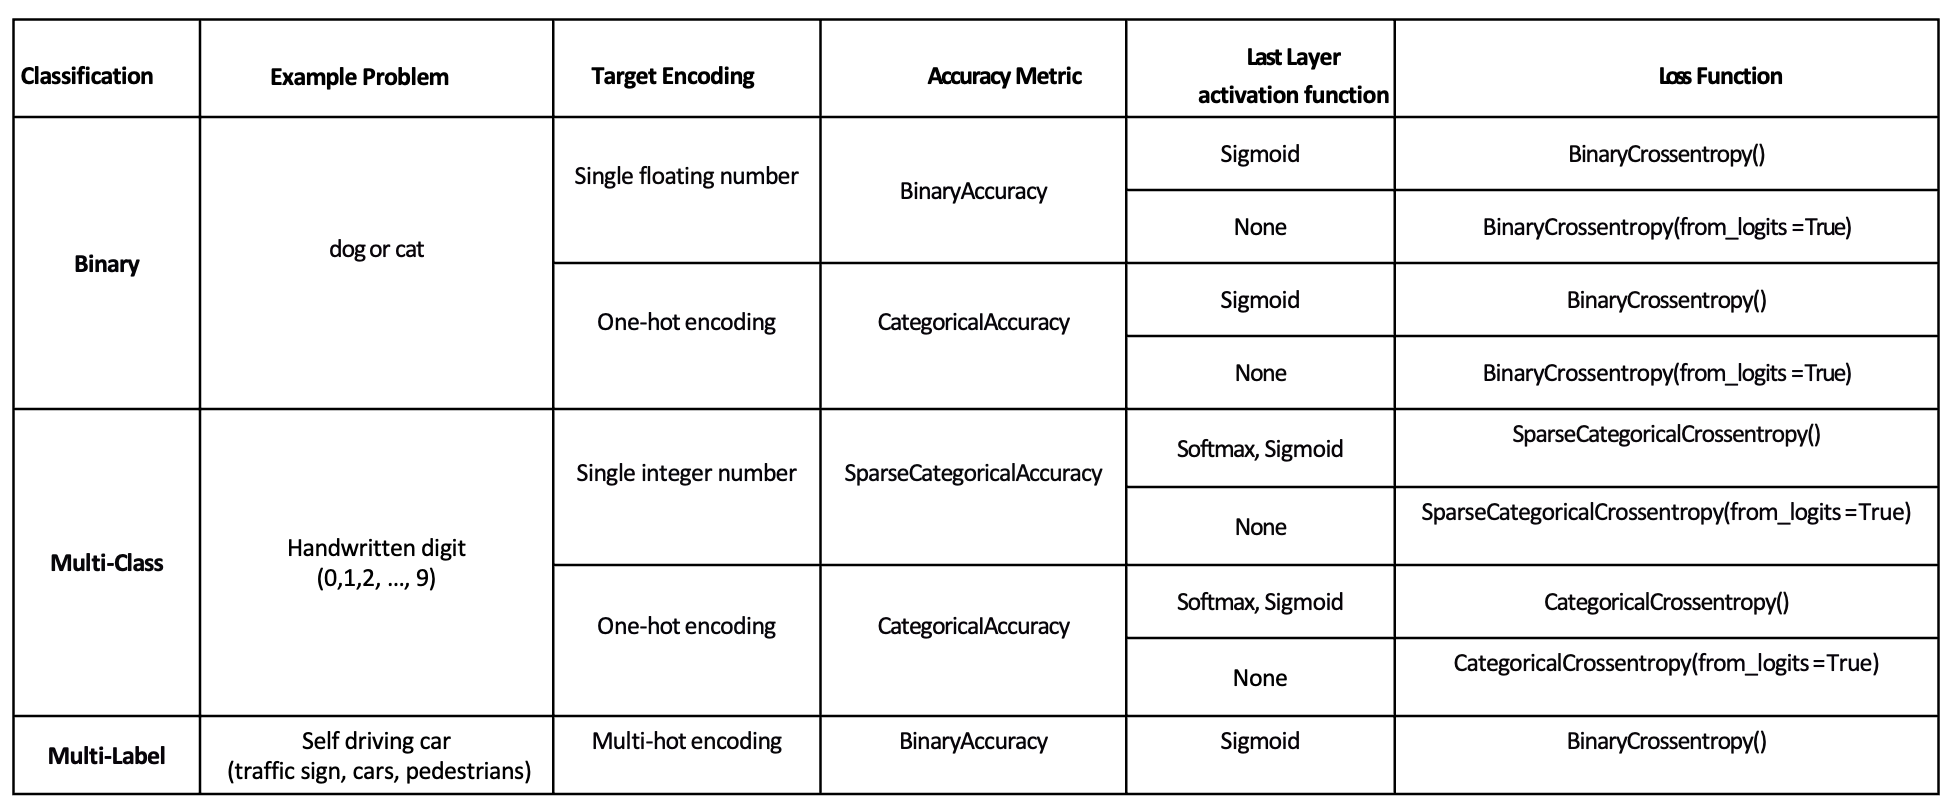

**Acknowledgement:** 
All credits go to [Professor Murat Karakaya](https://www.muratkarakaya.net) and his excellent contributions of this series of deep learning tutorials.
